In [76]:
from PIL import Image
import numpy as np
import os
from random import shuffle
#from tqdm import tqdm
import matplotlib.pyplot as plt

TRAIN_DIR = r'c:\data_python\Shoe Classifier\train'
TEST_DIR = r'c:\data_python\Shoe Classifier\test'

IMG_SIZE = 150
LR = 1e-3

MODEL_NAME = 'NIKEvsADIDAS--{}-{}.model'.format(LR, '2conv-basic')

In [77]:
def label_img(img):
    # Images are formatted as: ADIDAS_1, NIKE_3 ...
    word_label = img.split('_')[0]
    if word_label == 'ADIDAS': return [1,0] #one hot encoding
    elif word_label == 'NIKE': return [0,1] #one hot encoding

In [9]:
os.listdir(TRAIN_DIR)

['ADIDAS_1.png',
 'ADIDAS_10.png',
 'ADIDAS_11.png',
 'ADIDAS_12.png',
 'ADIDAS_13.png',
 'ADIDAS_14.png',
 'ADIDAS_15.png',
 'ADIDAS_16.png',
 'ADIDAS_17.png',
 'ADIDAS_18.png',
 'ADIDAS_19.png',
 'ADIDAS_2.png',
 'ADIDAS_20.png',
 'ADIDAS_21.png',
 'ADIDAS_22.png',
 'ADIDAS_23.png',
 'ADIDAS_24.png',
 'ADIDAS_25.png',
 'ADIDAS_26.png',
 'ADIDAS_27.png',
 'ADIDAS_28.png',
 'ADIDAS_29.png',
 'ADIDAS_3.png',
 'ADIDAS_30.png',
 'ADIDAS_31.png',
 'ADIDAS_32.png',
 'ADIDAS_33.png',
 'ADIDAS_34.png',
 'ADIDAS_35.png',
 'ADIDAS_36.png',
 'ADIDAS_37.png',
 'ADIDAS_38.png',
 'ADIDAS_39.png',
 'ADIDAS_4.png',
 'ADIDAS_40.png',
 'ADIDAS_41.png',
 'ADIDAS_42.png',
 'ADIDAS_43.png',
 'ADIDAS_44.png',
 'ADIDAS_45.png',
 'ADIDAS_46.png',
 'ADIDAS_47.png',
 'ADIDAS_48.png',
 'ADIDAS_49.png',
 'ADIDAS_5.png',
 'ADIDAS_50.png',
 'ADIDAS_6.png',
 'ADIDAS_7.png',
 'ADIDAS_8.png',
 'ADIDAS_9.png',
 'NIKE_1.png',
 'NIKE_10.png',
 'NIKE_11.png',
 'NIKE_12.png',
 'NIKE_13.png',
 'NIKE_14.png',
 'NIKE_15.png'

In [78]:
def create_train_data():
    train_data = []
    for img in os.listdir(TRAIN_DIR):
        label = label_img(img)
        path = os.path.join(TRAIN_DIR, img)
        ############################################################
        #    This part is different from sentdex's tutorial
        # Chose to use PIL instead of cv2 for image pre-processing
        ############################################################
        
        img = Image.open(path) #Read image syntax with PIL Library
        img = img.convert('L') #Grayscale conversion with PIL library
        img = img.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS) #Resizing image syntax with PIL Library
        
        ############################################################
        
        train_data.append([np.array(img), np.array(label)])
    shuffle(train_data)
    np.save('train_data.npy', train_data) #.npy extension = numpy file
    return train_data


In [79]:
def process_test_data():
    test_data = []
    for img in os.listdir(TEST_DIR):
        path = os.path.join(TEST_DIR, img)
        if "DS_Store" not in path:
            img_num = img.split('.')[0] #images are formatted 'NIKE_2', 'ADIDAS_56'..
        
            #PIL LIBRARY instead of cv2
            img = Image.open(path)
            img = img.convert('L')
            img = img.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
        
            test_data.append([np.array(img), img_num])
    shuffle(test_data)
    np.save('test_data.npy', test_data)
    return test_data
        

In [80]:
train_data = create_train_data()
#plt.imshow(train_data[44][0], cmap = 'gist_gray')
#print(train_data[1][1])


In [6]:
train_data

[[array([[ 46, 247, 255, ...,   0,   0,   0],
         [ 49, 248, 255, ...,  15,   9,   3],
         [ 52, 250, 255, ..., 222, 217, 212],
         ...,
         [212, 217, 222, ..., 255, 250,  52],
         [  3,   9,  15, ..., 255, 248,  49],
         [  0,   0,   0, ..., 255, 247,  46]], dtype=uint8), array([0, 1])],
 [array([[245, 245, 245, ..., 241, 241, 243],
         [246, 244, 246, ..., 241, 245, 245],
         [244, 244, 244, ..., 243, 245, 245],
         ...,
         [243, 244, 247, ..., 243, 246, 247],
         [246, 244, 244, ..., 246, 242, 245],
         [245, 243, 244, ..., 244, 244, 244]], dtype=uint8), array([0, 1])],
 [array([[  0,  54, 255, ...,   0,   0,   0],
         [  0,  61, 255, ...,   0,   0,   0],
         [  0,  67, 255, ...,   0,   0,   0],
         ...,
         [  0,   0,   0, ..., 255,  67,   0],
         [  0,   0,   0, ..., 255,  61,   0],
         [  0,   0,   0, ..., 255,  54,   0]], dtype=uint8), array([1, 0])],
 [array([[  0,   0,   0, ..., 255, 17

In [94]:
import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression

import tensorflow as tf
tf.reset_default_graph()

convnet = input_data(shape=[None, IMG_SIZE, IMG_SIZE, 1], name = 'input')
convnet = conv_2d(convnet, 32, 5, activation = 'relu')
convnet = max_pool_2d(convnet, 5)
convnet = conv_2d(convnet, 64, 5, activation = 'relu')
convnet = max_pool_2d(convnet, 5)
convnet = conv_2d(convnet, 32, 5, activation = 'relu')
convnet = max_pool_2d(convnet, 5)
convnet = conv_2d(convnet, 64, 5, activation = 'relu')
convnet = max_pool_2d(convnet, 5)
convnet = conv_2d(convnet, 32, 5, activation = 'relu')
convnet = max_pool_2d(convnet, 5)
convnet = conv_2d(convnet, 64, 5, activation = 'relu')
convnet = max_pool_2d(convnet, 5)
convnet = fully_connected(convnet, 1024, activation = 'relu')
convnet = dropout(convnet, 0.8)
convnet = fully_connected(convnet, 2, activation = 'softmax')
convnet = regression(convnet, optimizer = 'adam', learning_rate = LR, loss = 'categorical_crossentropy', name = 'targets')
model = tflearn.DNN(convnet, tensorboard_verbose=3)

In [82]:
# DATA SPLITTING
# Data splitting is typically done 80% train and 20% test
# of the 80% of our data in the train set
# we set aside a small percentage as a validation set
# this is used to do parameter tuning before evaluating
# on our test set

train = train_data[:-500] #Train Set
test = train_data[-500:] #Validation Set

In [83]:
X = np.array([i[0] for i in train]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
Y = [i[1] for i in train]

test_x = np.array([i[0] for i in test]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
test_y = [i[1] for i in test]

In [92]:
model.fit({'input': X}, {'targets': Y}, n_epoch=5, validation_set=({'input': test_x}, {'targets': test_y}), snapshot_step=50, show_metric=True, run_id=MODEL_NAME)

Training Step: 359  | total loss: 0.31862 | time: 95.794s
| Adam | epoch: 015 | loss: 0.31862 - acc: 0.9658 -- iter: 1472/1502
Training Step: 360  | total loss: 0.28698 | time: 105.751s
| Adam | epoch: 015 | loss: 0.28698 - acc: 0.9692 | val_loss: 0.00725 - val_acc: 0.9980 -- iter: 1502/1502
--


[9.9999666e-01 3.3187844e-06]
[0.99498594 0.00501409]
[0.9986615  0.00133848]


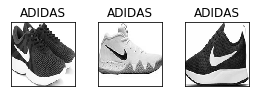

In [91]:
test_data = process_test_data()
fig = plt.figure()

for num, data in enumerate(test_data[:12]):
    img_num = data[1]
    img_data = data[0]
    
    y = fig.add_subplot(3,4,num+1)
    orig = img_data
    data = img_data.reshape(IMG_SIZE, IMG_SIZE, 1)
    model_out = model.predict([data])[0]
    print(model_out)
    if np.argmax(model_out) == 1:
        str_label = 'NIKE'
    else:
        str_label = 'ADIDAS'
    
    y.imshow(orig, cmap = 'gray')
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
plt.show()

In [88]:
path = r'c:\data_python\Shoe Classifier\test\test9.jpg'
#path = os.path.join(TEST_DIR, img)


img = Image.open(path) #Read image syntax with PIL Library

img = img.convert('L') #Grayscale conversion with PIL library
img = img.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS) #Resizing image syntax with PIL Library
data_single = np.array(img)

data_transfer = data_single.reshape(IMG_SIZE, IMG_SIZE, 1)
model_out = model.predict([data_transfer])
if np.argmax(model_out) == 1:
    str_label = 'NIKE'
else:
    str_label = 'ADIDAS'
#plt.title(str_label)
str_label


'ADIDAS'

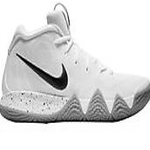

In [89]:
img

In [74]:
img = Image.open(r'c:\data_python\Shoe Classifier\test\test7.jpg')
img = img.convert('L') #Grayscale conversion with PIL library
img = img.resize((150, 150), Image.ANTIALIAS) #Resizing image syntax with PIL Library
img_array = np.array(img)
img_array.shape

(150, 150)

In [75]:
img_array

array([[255, 255, 255, ..., 254, 254, 254],
       [255, 255, 255, ..., 254, 254, 254],
       [255, 255, 255, ..., 254, 254, 254],
       ...,
       [254, 254, 254, ..., 255, 255, 255],
       [254, 254, 254, ..., 255, 255, 255],
       [254, 254, 254, ..., 255, 255, 255]], dtype=uint8)